<a href="https://colab.research.google.com/github/sydmason6/QuantNeuro/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

In [7]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

712 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7120


701 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7010


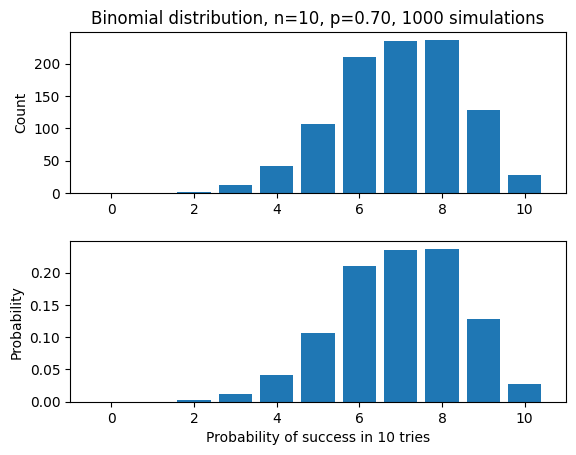

In [5]:


# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

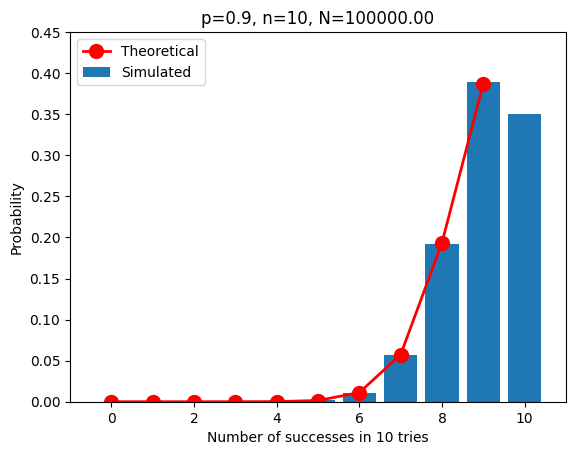

In [6]:

# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)


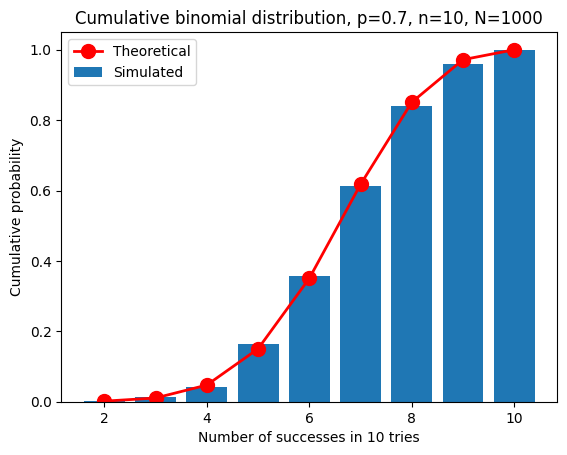

In [8]:

# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))


In [9]:
# Exercise 1
p = 0.2
n = 10

# Number of success for quanta being released
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

2 successes out of 10 trials, simulated p = 0.2000, empirical p = 0.2000


In [14]:
# Exercise 2
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n = 14

# Number of success for quanta being released
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
[print("{:3}{:20}".format(*x)) for x in np.c_[p, num_successes]][0]

0.1                 2.0
0.2                 0.0
0.3                 4.0
0.4                 4.0
0.5                 8.0
0.6                 8.0
0.7                11.0
0.8                12.0
0.9                13.0
1.0                14.0


If 8 quanta were released, the most likely probability of release given this experiment is between 0.5 and 0.6.

In [2]:
# Exericse 3

import math

def likelihood(p, n, k):
    """
    Calculate the likelihood of observing k successes in n trials with probability p.
    """
    return (p**k) * ((1-p)**(n-k))

def log_likelihood(p, n, k):
    """
    Calculate the log-likelihood of observing k successes in n trials with probability p.
    """
    if p == 0:
        return -float('inf')  # log(0) is undefined, return negative infinity
    elif p == 1:
        return float('-inf')  # log(1) is 0, return negative infinity for consistency
    else:
        return k * math.log(p) + (n-k) * math.log(1-p)


# Given data
n1 = 14  # Number of experiments in first measurement
k1 = 8  # Number of successes in first measurement

n2 = 14  # Number of experiments in second measurement
k2 = 5  # Number of successes in second measurement

# True release probability
true_p = 0.1

# Calculate likelihood and log-likelihood for each measurement
likelihood_1 = likelihood(true_p, n1, k1)
log_likelihood_1 = log_likelihood(true_p, n1, k1)

likelihood_2 = likelihood(true_p, n2, k2)
log_likelihood_2 = log_likelihood(true_p, n2, k2)

# Total likelihood and log-likelihood for both measurements
total_likelihood = likelihood_1 * likelihood_2
total_log_likelihood = log_likelihood_1 + log_likelihood_2

# Compute likelihood and log-likelihood functions for a range of release probabilities
release_probabilities = [i/10 for i in range(11)]

max_likelihood = 0
max_log_likelihood = float('-inf')
best_p = None

for p in release_probabilities:
    likelihood_1 = likelihood(p, n1, k1)
    likelihood_2 = likelihood(p, n2, k2)
    total_likelihood = likelihood_1 * likelihood_2

    log_likelihood_1 = log_likelihood(p, n1, k1)
    log_likelihood_2 = log_likelihood(p, n2, k2)
    total_log_likelihood = log_likelihood_1 + log_likelihood_2

    if total_likelihood > max_likelihood:
        max_likelihood = total_likelihood
        best_p = p

    if total_log_likelihood > max_log_likelihood:
        max_log_likelihood = total_log_likelihood

# Output results
print(f"Total Likelihood: {max_likelihood}")
print(f"Total Log-Likelihood: {max_log_likelihood}")
print(f"Best estimate for release probability: {best_p}")


Total Likelihood: 3.725290298461914e-09
Total Log-Likelihood: -19.408121055678468
Best estimate for release probability: 0.5


In [14]:
# Exercise 4

import math

data = [
    (0, 0), (1, 0), (2, 3), (4, 10), (5, 19),
    (6, 26), (7, 16), (8, 16), (9, 5), (10, 5),
    (11, 0), (12, 0), (13, 0), (14, 0)
]

# Initialize variables to keep track of best estimate and maximum likelihood
best_estimate = 0.5
max_likelihood = 1

# Iterate over possible values of p with a resolution of 0.01
for p in range(101):
    p = p / 100  # Convert to decimal

    # Calculate likelihood for each data point and multiply them
    likelihood = 1
    for k, n in data:
        likelihood = (p*k) * ((1-p)*(n-k))

    # Update best estimate if likelihood is greater
    if likelihood > max_likelihood:
        max_likelihood = likelihood
        best_estimate = p

# Convert best estimate back to decimal
best_estimate = best_estimate / 100

print(f"The maximum likelihood estimate of p (p-hat) is: {best_estimate}")




The maximum likelihood estimate of p (p-hat) is: 0.005


In [15]:
# Exercise 5

from scipy.stats import binom

# Parameters
n = 14  # Total number of available quanta
p_null = 0.3  # Null hypothesis: True release probability
p_hat = 0.5  # Sample proportion

# Calculate the cumulative probability of observing 7 or more events if H0 is true
probability_observed_or_more = 1 - binom.cdf(6, n, p_null)

# Check if the probability is less than the significance level (alpha)
alpha = 0.05
if probability_observed_or_more < alpha:
    conclusion = "Reject the Null Hypothesis (H0)"
else:
    conclusion = "Fail to reject the Null Hypothesis (H0)"

print(f"Sample proportion (p-hat): {p_hat}")
print(f"Probability of observing 7 or more events under the Null Hypothesis: {probability_observed_or_more}")
print(f"Conclusion at {alpha} significance level: {conclusion}")


Sample proportion (p-hat): 0.5
Probability of observing 7 or more events under the Null Hypothesis: 0.09328189116275998
Conclusion at 0.05 significance level: Fail to reject the Null Hypothesis (H0)
